# Lesson 6 - Starter Code

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

# read in the mammal dataset
wd = '../../assets/dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')   # append to string
mammals = mammals[mammals.brainwt.notnull()].copy()

### Explore our mammals dataset

In [23]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Exercise: (5 minutes) Further explore the mammals dataset

In [6]:
mammals.info()    # describe data, see how many non-null values there are

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 82
Data columns (total 11 columns):
name            56 non-null object
genus           56 non-null object
vore            51 non-null object
order           56 non-null object
conservation    36 non-null object
sleep_total     56 non-null float64
sleep_rem       48 non-null float64
sleep_cycle     30 non-null float64
awake           56 non-null float64
brainwt         56 non-null float64
bodywt          56 non-null float64
dtypes: float64(6), object(5)
memory usage: 5.2+ KB


In [2]:
mammals.describe()

C:\Users\Yaroslav\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
count,56.000000,48.000000,30.000000,56.000000,56.000000,56.000000
mean,10.171429,1.916667,0.430556,13.828571,0.281581,202.981768
std,4.421794,1.184354,0.365570,4.421794,0.976414,945.856609
min,2.900000,0.400000,0.116667,4.100000,0.000140,0.005000
25%,7.575000,NaN,NaN,11.425000,0.002900,0.290000
50%,9.950000,NaN,NaN,14.050000,0.012400,2.250000
75%,12.575000,NaN,NaN,16.425000,0.125500,27.301250
max,19.900000,6.100000,1.500000,21.100000,5.712000,6654.000000


In [3]:
mammals.corr()           # some variables are highly correlated

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
sleep_total,1.000000,0.713523,-0.515919,-1.000000,-0.360487,-0.314833
sleep_rem,0.713523,1.000000,-0.352294,-0.713523,-0.221335,-0.274431
sleep_cycle,-0.515919,-0.352294,1.000000,0.515919,0.851620,0.434302
awake,-1.000000,-0.713523,0.515919,1.000000,0.360487,0.314833
brainwt,-0.360487,-0.221335,0.851620,0.360487,1.000000,0.933782
bodywt,-0.314833,-0.274431,0.434302,0.314833,0.933782,1.000000


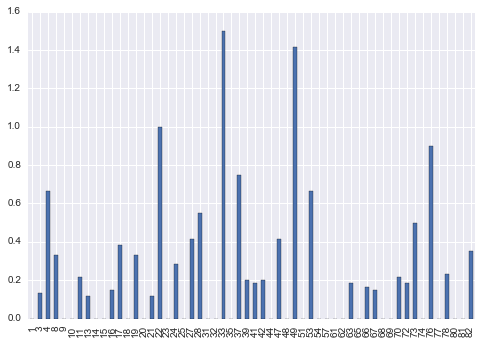

In [5]:
mammals.sleep_cycle.plot(kind='bar')

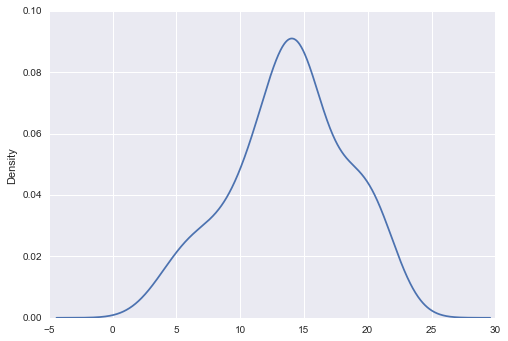

In [7]:
mammals.awake.plot(kind='density')            # distribution of awake column

### Lets check out a scatter plot of body weight and brain weight

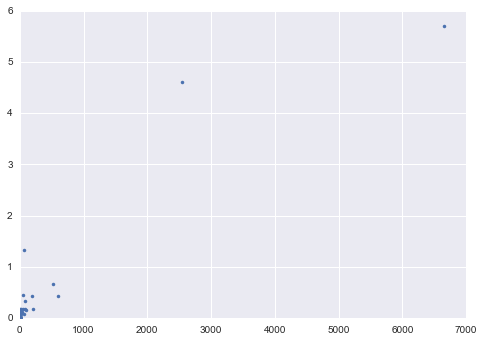

In [8]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')        # dots
# show the plot
plt.show()

**Explanation:** We're using "seaborn" a newer plotting library than matplotlib with slightly different syntax, to create these plots.

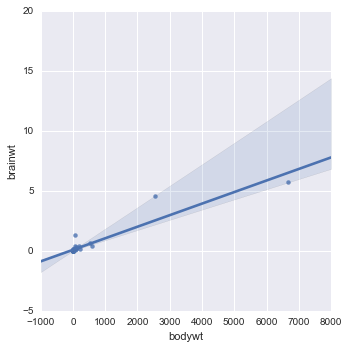

In [9]:
sns.lmplot('bodywt', 'brainwt', mammals)      # linear model, using seaborn

**Explanation:** Seaborn has nice, clean syntax and allows you to create certain simple visuals with little code.

### Discussion:

Is there a linear relationship between "brain weight" and "body weight"?

Hard to say, since neither variable is _normally distributed_:

A common technique to use here is to apply a _logarithmic transformation_ to these variables to better investigate their relationship. 

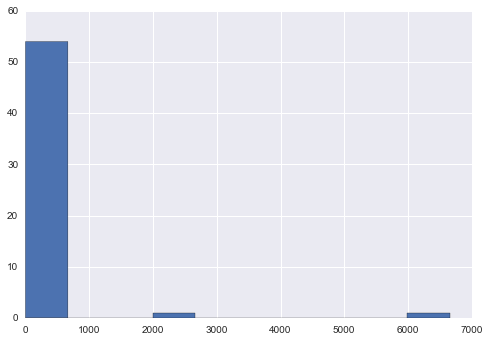

In [10]:
mammals.bodywt.hist()   # histogram

In [11]:
log_columns = ['bodywt', 'brainwt'] # 2 columns in an array
log_mammals = mammals.copy()        # copy the data over
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)      # apply log transform

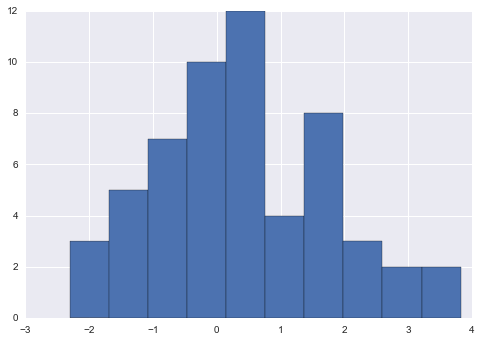

In [13]:
log_mammals.bodywt.hist()   # more normal distribution

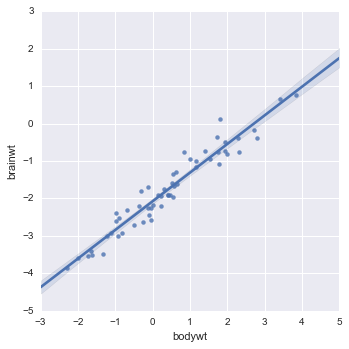

In [15]:
sns.lmplot('bodywt', 'brainwt', log_mammals)         # lower variation, smaller error bands for the regression

## Guided Practice: Using Seaborn to generate single variable linear model plots (15 mins)
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


In [25]:
mammals.sleep_rem.value_counts()            # count the values in the series

0.6    4
2.4    4
1.4    4
1.1    3
2.0    3
1.0    2
1.5    2
3.1    2
1.8    2
0.5    2
2.3    2
3.5    1
3.2    1
1.9    1
2.9    1
2.7    1
0.7    1
3.9    1
6.1    1
4.9    1
2.2    1
0.8    1
3.4    1
1.3    1
2.6    1
2.1    1
0.9    1
1.2    1
0.4    1
Name: sleep_rem, dtype: int64

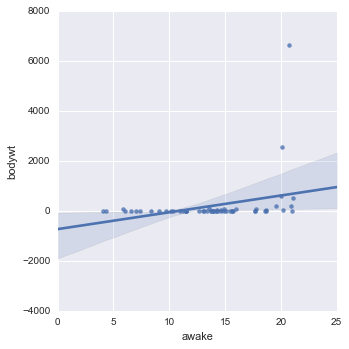

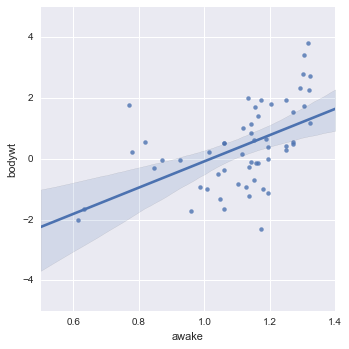

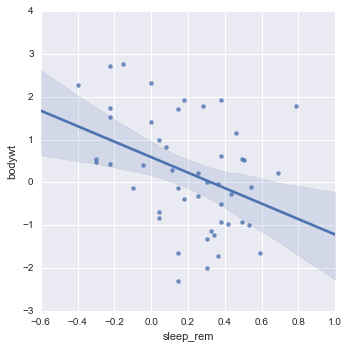

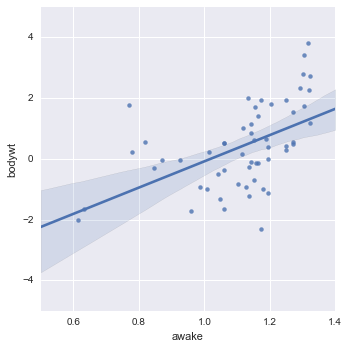

In [20]:
log_columns = ['bodywt', 'brainwt', 'awake', 'sleep_rem']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)    # log transform



# one other example, using brainwt and awake.
x = 'awake'
y = 'bodywt'
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

sns.lmplot('sleep_rem', 'bodywt', log_mammals)
sns.lmplot('awake', 'bodywt', log_mammals)

##### Complete below for sleep_rem and awake as a y, with variables you've already used as x.


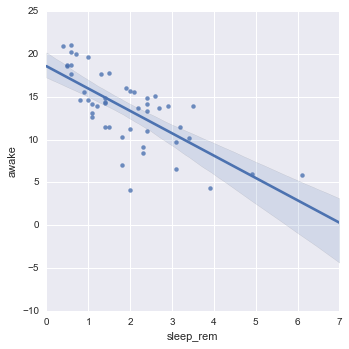

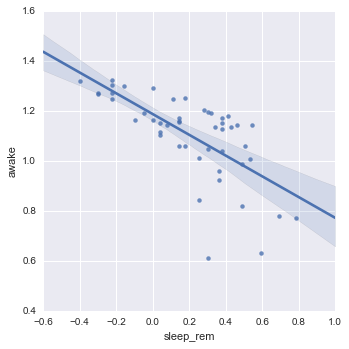

In [26]:
sns.lmplot('sleep_rem', 'awake', mammals)
sns.lmplot('sleep_rem', 'awake', log_mammals)

## Introduction: Single Regression Analysis in statsmodels & scikit (10 mins)

In [28]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf    # stats model formula, smf

X = mammals[['bodywt']]
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=mammals).fit()
#print the full summary
lm.summary()                        # ordinary least squares. predictor is blue, best least unbiased estimator

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           9.16e-26
Time:                        19:05:06   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
X              0.0010   5.03e-05     19.176      0.000         0.001     0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use Statsmodels to make the prediction

In [29]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50, 20, 10.5]})
X_new.head()

,X
0,50.0
1,20.0
2,10.5


In [30]:
lm.predict(X_new)     # predict

array([ 0.13411477,  0.10519629,  0.09603878])

### Repeat in Scikit with handy plotting

When modeling with sklearn, you'll use the following base principals:

- All sklearn estimators (modeling classes) are based on this base estimator. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix, X, either sparse or dense.
- Many estimators also take a vector, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of y given X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are appropriate to each estimator algorithm.

 Predictions vs. actuals 


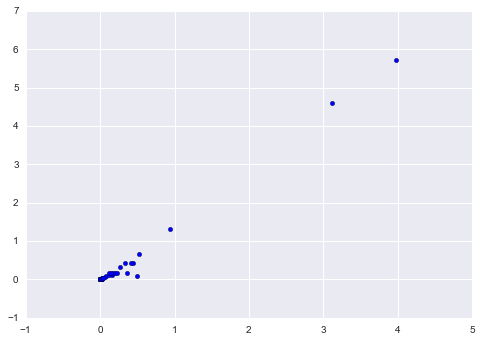

Predictions: [  1.17140000e-02   3.15059365e-04   4.37400000e-01   7.23600000e-02
   8.47680000e-02   1.58528000e-01   9.77466667e-03   8.43800000e-03
   7.51873651e-04   5.97200000e-03   3.15059365e-04   2.01026667e-02
   1.27584733e-02   8.46456000e-03   3.11660000e+00   3.15059365e-04
   5.20920000e-01   3.37560000e-01   7.79866667e-03   1.17192000e-01
   2.57786667e-02   4.02320000e-03   2.65160000e-01   1.24344733e-02
   9.37040000e-01   3.98332000e+00   1.17848000e-01   1.42880000e-03
   3.15059365e-04   3.15059365e-04   1.09765600e-02   1.24344733e-02
   3.55840000e-01   4.19440000e-01   1.76880000e-01   1.50528000e-01
   7.24600000e-03   1.11165600e-02   4.91000000e-01   2.48960000e-02
   3.28520000e-03   1.57986667e-02   1.27754032e-03   1.82640000e-03
   2.46480000e-03   5.05866667e-03   3.13800000e-03   4.50148254e-04
   2.01360000e-01   2.55760000e-02   2.27560000e-01   3.94266667e-03
   2.65800000e-03   1.23077600e-02   3.18266667e-02   4.08160000e-02]
Residuals: [  3.7860

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [56]:
from sklearn import feature_selection, linear_model          # SK learn Seth uses daily
# from sklearn import ensemble.RandomrForestRegressor     # RF algorithm
from sklearn.ensemble import RandomForestRegressor

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    # algo = LinearModel object, set below
    algo.fit(X,y)                       # fit the model, using the data (training data)
    predictions = algo.predict(X)
    print "Predictions vs. actuals "
    plt.scatter(predictions,y)
    plt.show()
    
    print "Predictions: " + str(predictions)
    residuals = (y-algo.predict(X)).values
    print "Residuals: " + str(residuals)

    # print the necessary values 
    print 'P Values:', pvals                # attributes of the model
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    
    print "Histogram of Residuals "
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo   # fitted model

X = mammals[['bodywt']]
y = mammals['brainwt']
# lm = linear_model.LinearRegression(fit_intercept=True)      # google sk learn Linear Model, can remove the intercept
lm = RandomForestRegressor(n_estimators=25)   # random forest fits the data well
lm = get_linear_model_metrics(X, y, lm)       # use function defined above

## Demo: Significance is Key (20 mins)

### What does our output tell us?

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* The model explains, roughly, 87% of the variance of the dataset (the largest errors being in the large brain and body sizes)  
* With this current model, brainwt is roughly bodywt * 0.00096395  
* The residuals, or error in the prediction, is not normal, with outliers on the right. A better with will have similar to normally distributed error.

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [31]:
# prediction at 0?
print lm.predict([[0]])

[ 0.08591731]


P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451
[ 0.]


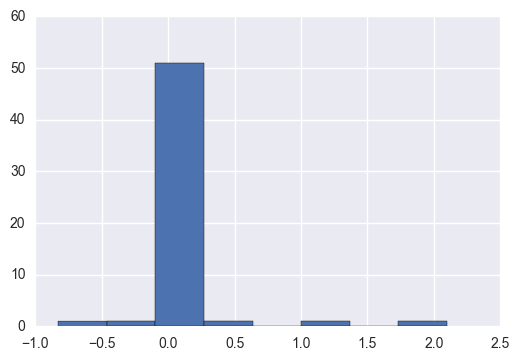

In [32]:
lm = linear_model.LinearRegression(fit_intercept=False)      # no intercept
lm = get_linear_model_metrics(X, y, lm)
# prediction at 0?
print lm.predict([[0]])

## Intrepretation?


Brain weight should be zero if body weight is zero.

## Guided Practice: Using the LinearRegression object (15 mins)

We learned earlier that the data in its current state does not allow for the best linear regression fit. 

With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance. 

Complete the following code to update X and y to match the log-transformed data. 

Complete the loop by setting the list to be one True and one False.  (skipped in class)

In [ ]:
#starter
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

loop = [True, False]      #include and exclude the intercept
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print

Predictions vs. actuals 


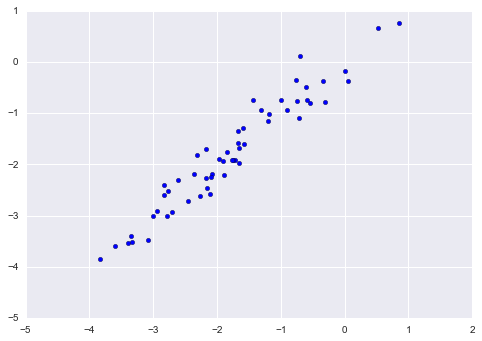

Predictions: [-2.31783366 -3.39096358  0.05180348 -1.19695829 -1.17849212 -0.90702566
 -2.17942344 -2.36220688 -3.00884359 -2.07393164 -3.83459182 -1.65763157
 -1.7144418  -1.89760094  0.53223149 -3.32747487  0.00488872 -0.3356053
 -2.1607846  -1.30876987 -1.6771846  -2.60875677 -0.59761404 -1.75322992
 -0.70246205  0.85134515 -1.43692765 -2.77850695 -3.34224643 -3.60425518
 -1.96212005 -1.76944316 -0.73926534 -0.75963584 -0.5436081  -1.00117231
 -2.27259618 -1.91361876 -0.71335829 -1.64827024 -2.45257196 -2.17264607
 -2.93469175 -2.70881565 -2.77301417 -2.10163981 -2.83578686 -3.08299543
 -0.59276278 -1.5741184  -0.30103637 -2.10894352 -2.82606015 -1.843595
 -1.6692248  -1.59467994]
Residuals: [ 0.50816536 -0.14663842 -0.42546312  0.04205633  0.1706036  -0.0322765
 -0.08021387  0.16838685  0.00884359 -0.10652442 -0.01928014 -0.30894467
 -0.19565309 -0.30305851  0.13080948 -0.19540388 -0.18864742 -0.04218068
 -0.29514736  0.36946771  0.08542456  0.30772677  0.1094974  -0.15792552
  0.8

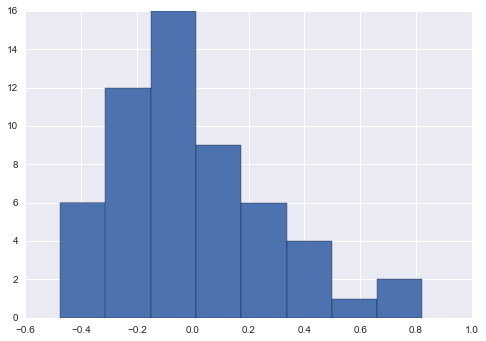

In [51]:
X = mammals[['bodywt']].apply(np.log10)
y = mammals['brainwt'].apply(np.log10)
lm = linear_model.LinearRegression(fit_intercept=True)      # google sk learn Linear Model, can remove the intercept

lm = get_linear_model_metrics(X, y, lm)       # log transform on X and Y lead to a good fitted model

### Which model performed the best? The worst? Why?


Your answer here:  log-data had a higher R squared value (0.931)

Using No intercept has large residuals and the Rsquared is -2.4, not sensible.

### Advanced Methods! 

We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.23454772]
y-intercept: -1.85931606304
R-Squared: 0.483728109403

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)
P Values: [  3.56282243e-33]
Coefficients: [ 0.75797972]
y-intercept: -2.07102674342
R-Squared: 0.931769516561

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.39504621]
y-intercept: -1.9242323166
R-Squared: 0.71382228495



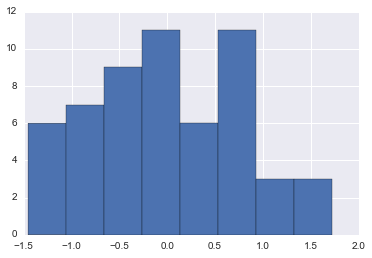

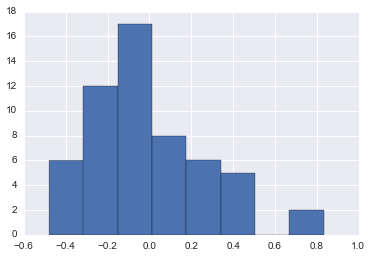

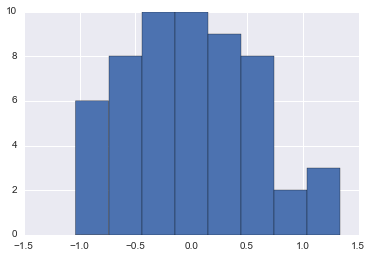

In [49]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']
                            #Lasso, least absolute shrinkage, ridge (regularized regression, normalization term) penalty for large coefficients
estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]
         # loop through estimators
for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print


## Introduction: Multiple Regression Analysis using citi bike data (10 minutes)


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the Y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [57]:
wd = '../../assets/dataset/bikeshare/'         # working directory
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [64]:
bike_data.weathersit.value_counts()    # see if the variable is categorical.    temp, atemp, hum, windspeed continuous
# casual - count of casual rides

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

### Spend 5 minutes getting to know this data. For example, which variables are categorical vs. continuous?

### What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

In [65]:
bike_data[['temp','atemp']].describe()      # data normalized

,temp,atemp
count,17379.000000,17379.000000
mean,0.496987,0.475775
std,0.192556,0.171850
min,0.020000,0.000000
25%,0.340000,0.333300
50%,0.500000,0.484800
75%,0.660000,0.621200
max,1.000000,1.000000


            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.775)


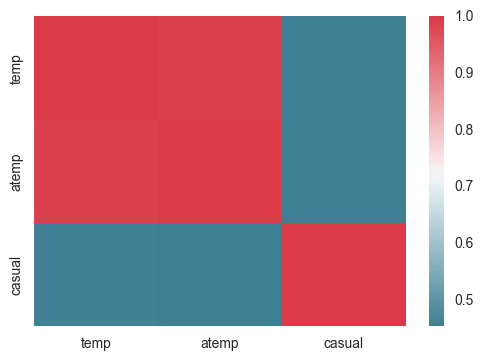

In [37]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)    # correlation matrix, cmap, heatmap

### What does the correlation matrix explain?

Answer: temp and atemp are highly correlated.

## We can measure this effect in the coefficients:



temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



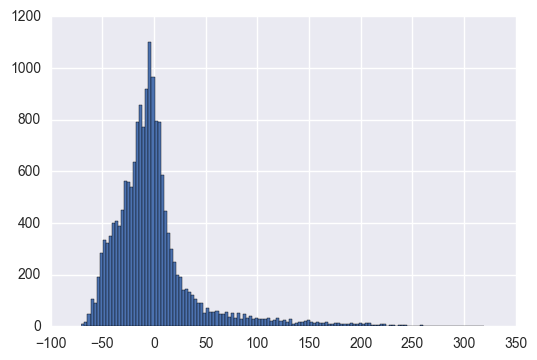

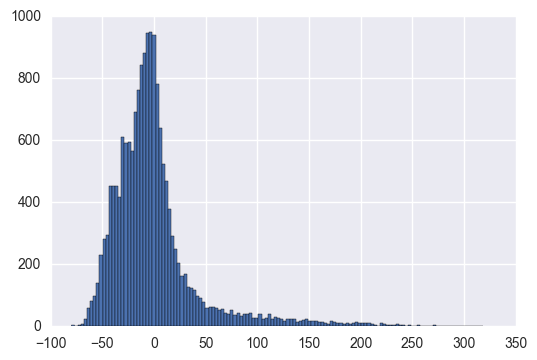

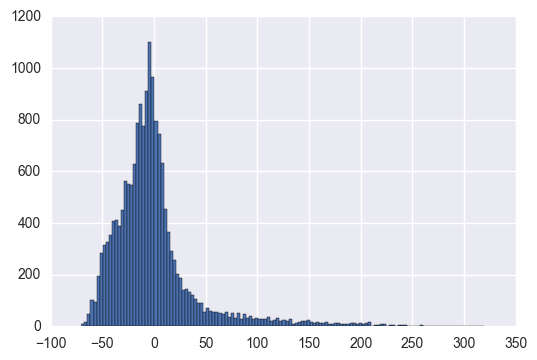

In [39]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)
                         # adding in a variable that is highly correlated to one already in the model, does
                         # not add information to the model, it doesn't increase the Rsquared significantly
for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

In [ ]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation?

Answer: 

### Another caution

A danger of colinearity is that, in Linear Regression, it can appear that variables are insignificant only because they are correlation with other variables in your dataset. When a single variable is used, it can then be significant. Here's an illustration:

In [67]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = bike_data[['temp']]
y = bike_data['casual']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
# using the stats model, not sk learn -v
lm = smf.ols(formula='casual ~ temp + atemp', data=bike_data).fit()      # if we exclude temp, atemp will be signif
# lm = smf.ols(formula='casual ~ atemp', data=bike_data).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     2327.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        20:36:01   Log-Likelihood:                -90341.
No. Observations:               17379   AIC:                         1.807e+05
Df Residuals:                   17376   BIC:                         1.807e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -22.8703      1.031    -22.191      0.000       -24.890   -20.850
temp         116.3402     11.021     10.556      0.000        94.738   137.942
atemp          1.5280     12.349      0.124      0.902       -22.677    25.733
==============================================================================
Omnibus:                     9349.145   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76211.691
Skew:                           2.491   Prob(JB):                         0.00
Kurtosis:                      11.968   Cond. No.                         60.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


In [69]:
np.corrcoef(bike_data.temp, bike_data.hum)      # numpy corr coef, vars are not correlated

array([[ 1.        , -0.06988139],
       [-0.06988139,  1.        ]])

P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

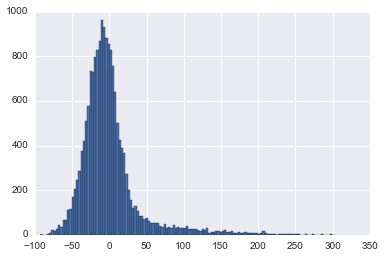

In [99]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())     # Rsquared is improved to 0.3


## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1). singular matrix, not invertible, columns not independent.

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

Predictions vs. actuals 


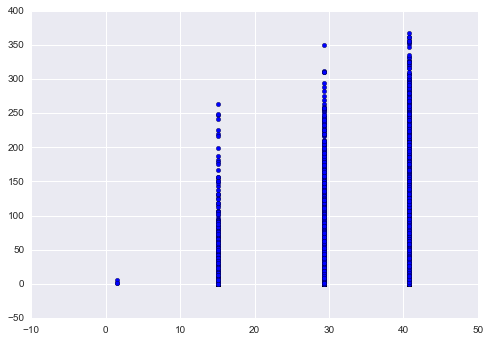

Predictions: [ 40.78515625  40.78515625  40.78515625 ...,  40.78515625  40.78515625
  40.78515625]
Residuals: [-37.78515625 -32.78515625 -35.78515625 ..., -33.78515625 -27.78515625
 -28.78515625]
P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354132913
Histogram of Residuals 

Predictions vs. actuals 


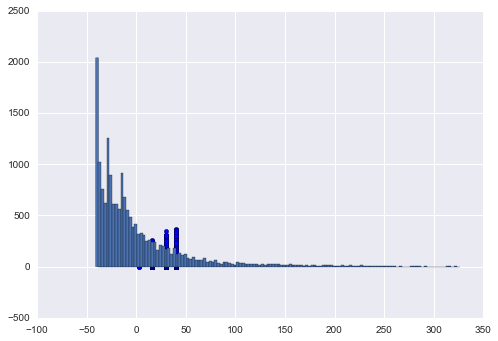

Predictions: [ 40.54543065  40.54543065  40.54543065 ...,  40.54543065  40.54543065
  40.54543065]
Residuals: [-37.54543065 -32.54543065 -35.54543065 ..., -33.54543065 -27.54543065
 -28.54543065]
P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841
Histogram of Residuals 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

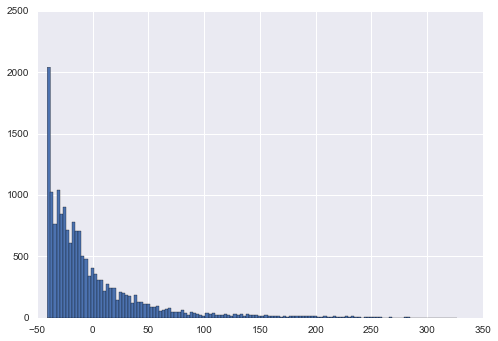

In [71]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)   # dummy variabled of weather categorical variable

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm) # select the 1,2,3,4 columns of the data frame
print
# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

# get the same result for Rsquared. can use 3 or 4 of the categories, 1 is explained by the other three (n-1) vars needed

### Similar in Statsmodels

In [101]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     104.0
Date:                Thu, 04 Feb 2016   Prob (F-statistic):           1.04e-87
Time:                        11:34:52   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                 6.782e+11   1.08e+13      0.063      0.950     -2.06e+13  2.19e+13
weather[[1, 2, 3, 4]][0] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][1] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][2] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
weather[[1, 2, 3, 4]][3] -6.782e+11   1.08e+13     -0.063      0.950     -2.19e+13  2.06e+13
==============================================================================
Omnibus:                     9002.161   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58970.408
Skew:                           2.469   Prob(JB):                         0.00
Kurtosis:                      10.554   Cond. No.                     8.15e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.04e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
#droping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Thu, 04 Feb 2016   Prob (F-statistic):           8.08e-89
Time:                        11:34:53   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer:  The coefficient for the 2nd case is reasonable. Using 4 dummy variables gives non sensical coefficients -6e11. Need indep columns to have an invertible matrix, for regression.

## Guided Practice: Combining non-correlated features into a better model (15 mins)

In [67]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [64]:
#starter 
lm = linear_model.LinearRegression()
bikemodel_data = bike_data.join() # add in the three weather situations

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = # what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)

columns_to_keep = [] #[which_variables?]           # keep columns and build model
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

SyntaxError: invalid syntax (<ipython-input-64-97ddf3a04cab>, line 6)

In [65]:
#sklearn
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)

NameError: name 'bikemodel_data' is not defined

In [66]:
#Stats models
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
#print the full summary
lm.summary()

NameError: name 'bikemodel_data' is not defined

## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!